In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score

data = fetch_20newsgroups()

categories = data.target_names

train = fetch_20newsgroups(subset = 'train', categories = categories)
test = fetch_20newsgroups(subset = 'test', categories = categories)

class multin:

    def fit(self, data):

        #빈 vocablist 만들기    
        vocablist = set()

        #각 카테고리별로 text 구분해서 저장해주기 위한 2차원 리스트 생성
        traintext = []
        for n in range(len(categories)):
            textlist = []
            traintext.append(textlist)

        #각 카테고리에 텍스트스플릿해서 분배
        for index, cat in enumerate(data.target):
            vocab = data.data[index].lower().split()
            traintext[cat].append(vocab)

            #전체 단어가 들어있는 vocablist 만들기
            vocablist.update(vocab)

        #카테고리별로 단어 등장 count하고 저장하기 위한 리스트 생성
        wholecatprob = []

        #각 단어가 등장하는 카테고리 수 구하기 위한 dict 생성
        catprob = dict.fromkeys(vocablist, 0)

        for cat in range(len(categories)):

            #count가 모두 1로 초기화된 vocab이 key고 count 갯수가 value인 dict 생성
            count = []
            for num in range(len(vocablist)):
                count.append(1)
            probdict = dict(zip(vocablist, count))

            #count
            for text in traintext[cat]:
                for word in text:
                    probdict[word] += 1
            
            #단어가 이 카테고리에 등장하면 카테고리카운트에 +1
            for k in catprob.keys():
                if (probdict[k] > 1):
                    catprob[k] += 1

            #전체 등장 수로 count나눠 확률
            sum = 0
            for s in probdict.values():
                sum += s

            for k in vocablist:
                probdict[k] /= sum
                probdict[k] = np.log(probdict[k])

            wholecatprob.append(probdict)

        for v in catprob.keys():
            catprob[v] = len(categories) / catprob[v]
            catprob[v] = np.log(catprob[v])

        #모든 카테고리 속 각 단어의 확률에 위에 중복? 곱하기
        for c in wholecatprob:
            for k in c.keys():
                c[k] += catprob[k]

        return wholecatprob

    def predict(self, data, wholecatprob):

        reslist = []
        for text in data.data:

            text = text.lower().split()
            catprob = []
            
            for cat in wholecatprob:
                testprob = 0

                for word in text:
                    if word in cat:
                        testprob += cat[word]
                
                catprob.append(testprob)

            for i in range(len(catprob)):
                check = 1
                for j in range(i, len(catprob)):
                    if catprob[i] < catprob[j]:
                        check = 0
                        break
                if (check == 1):
                    break

            reslist.append(i)

        return reslist
    

model = multin()

wholecatprob = model.fit(train)
predcatlist = model.predict(test, wholecatprob)

realcat = [i for i in test.target]

accuracy = accuracy_score(realcat, predcatlist)
print("Accuracy: {:.2f}%".format(accuracy * 100))
    

Accuracy: 71.60%


In [2]:
realcatname = [test.target_names[i] for i in realcat]
predcatname = [test.target_names[i] for i in predcatlist]

print(realcatname[2], predcatname[2])

alt.atheism alt.atheism


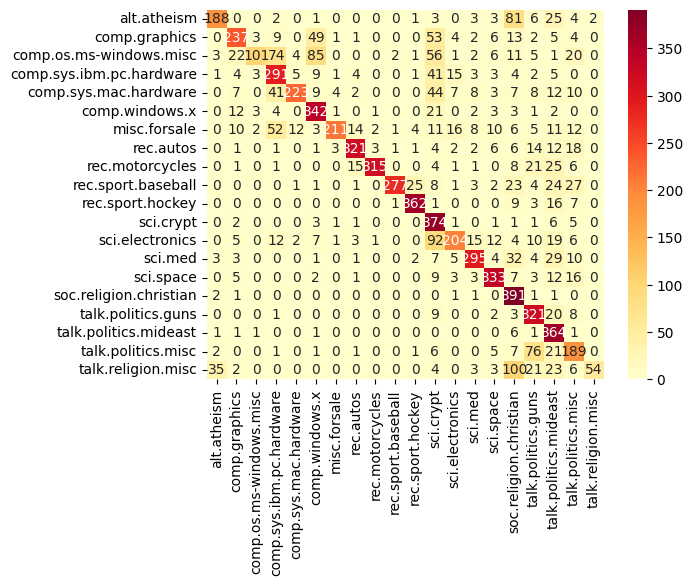

In [3]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(realcatname, predcatname)

sns.heatmap(cf, xticklabels = test.target_names, yticklabels = test.target_names, annot = True, cmap = 'YlOrRd', fmt = 'g')
plt.show()

In [4]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score

data = fetch_20newsgroups()

categories = data.target_names

train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)


class MultinomialNaiveBayes:

    def fit(self, data):
        # Create a set of all unique words in the training data
        vocab_set = set()

        # Separate text for each category
        traintext = [[] for _ in range(len(categories))]

        for index, cat in enumerate(data.target):
            vocab = set(data.data[index].lower().split())
            traintext[cat].extend(vocab)
            vocab_set.update(vocab)

        # Initialize category probabilities
        wholecatprob = []

        # Initialize word counts for each category
        catprob = dict.fromkeys(vocab_set, 0)

        for cat in range(len(categories)):
            # Initialize word counts for each category with Laplace smoothing
            count = [1] * len(vocab_set)
            probdict = dict(zip(vocab_set, count))

            # Count word occurrences
            for word in traintext[cat]:
                probdict[word] += 1

            # Update category word counts
            for k in catprob.keys():
                if probdict[k] > 1:
                    catprob[k] += 1

            # Calculate log probabilities
            probdict = {k: np.log(probdict[k] / sum(probdict.values())) for k in vocab_set}
            wholecatprob.append(probdict)

        # Update category probabilities
        catprob = {k: np.log(len(categories) / catprob[k]) for k in vocab_set}

        # Update overall probabilities by adding log probabilities
        for c in wholecatprob:
            for k in c.keys():
                c[k] += catprob[k]

        return wholecatprob

    def predict(self, data, wholecatprob):
        reslist = []

        for text in data.data:
            text = set(text.lower().split())
            catprob = []

            for cat in wholecatprob:
                testprob = sum(cat[word] for word in text if word in cat)
                catprob.append(testprob)

            # Find the index of the category with the highest probability
            predicted_category_index = np.argmax(catprob)
            reslist.append(predicted_category_index)

        return reslist


model = MultinomialNaiveBayes()

wholecatprob = model.fit(train)
predcatlist = model.predict(test, wholecatprob)

realcat = [i for i in test.target]

accuracy = accuracy_score(realcat, predcatlist)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 76.29%


In [ ]:
realcatname = [test.target_names[i] for i in realcat]
predcatname = [test.target_names[i] for i in predcatlist]

print(realcatname[2], predcatname[2])

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(realcatname, predcatname)

sns.heatmap(cf, xticklabels = test.target_names, yticklabels = test.target_names, annot = True, cmap = 'YlOrRd', fmt = 'g')
plt.show()